# Introduction to NLP fundamentals
NLP has the goal of deriving information from natural languages

Another common term of NLP problem is sequence to sequence problem(seq2seq)

## Get the helper function(To avoid writing repeated function)

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-08-14 04:56:13--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-08-14 04:56:13 (111 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import *

## Get the text dataset
Here we are working on binary classification problem..
the dataset we are using is from kaggle(introduction to NLP dataset). which is labeled as disaster and not disaster sample of tweets

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2022-08-14 04:56:16--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.125.128, 142.250.148.128, 209.85.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.007s  

2022-08-14 04:56:16 (81.6 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



Unzip the data


In [ ]:
unzip_data("nlp_getting_started.zip")

##Understanding the dataset/Becoming one with data/Visualizing our dataset
now we download and dunzip our dataset to working with the dataset first we need to understand the data/Becoming one with data

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

In [ ]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


**Shuffling our dataframe**

we are shuffling our dataframe to avoid our deep learning model to learn any pattern  in sequence

In [ ]:
shuffle_train_df = train_df.sample(frac = 1, random_state=42)
shuffle_train_df.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
# How many values we have in our train dataframe?
print(shuffle_train_df.target.value_counts())
print(f"lenth of our test dataset: {test_df.shape}")

0    4342
1    3271
Name: target, dtype: int64
lenth of our test dataset: (3263, 4)


**Let's view some random sample of our train datasets**

In [ ]:
import random

In [ ]:
random_index = random.randint(0, len(train_df)-5) #here we minus 5 from our dataset to avoid the index going to the out of range
for row in shuffle_train_df[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)"  if target >0 else "(not disaster)")
  print(f"TextL:\n{text}\n")
  print(f"---\n")

Target: 1 (real disaster)
TextL:
S61.231A Puncture wound without foreign body of left index finger without damage to nail initial encounter #icd10

---

Target: 1 (real disaster)
TextL:
Udhampur terror attack: Militants attack police post 2 SPOs injured http://t.co/zMWeCBWVaO

---

Target: 0 (not disaster)
TextL:
The once desolate valley was transformed into a thriving hub of hiÛÓtech business.

---

Target: 0 (not disaster)
TextL:
if firefighters acted like cops they'd drive around shooting a flamethrower at burning buildings

---

Target: 1 (real disaster)
TextL:
@dirk_trossen 

I've still got some of the snowstorm/hailstorm!

---



###Splitting our train data to train and validation data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_sent, val_sent, train_label, val_label = train_test_split(shuffle_train_df["text"].to_numpy(),
                                                                shuffle_train_df["target"].to_numpy(),
                                                                test_size = 0.1, # to use 10% of data as validation data
                                                                random_state= 42)

In [ ]:
#Check the length of our splitting datasets
len(train_sent), len(val_sent), len(train_label), len(val_label)

(6851, 762, 6851, 762)

**Let's check some sample of our splitting dataset**

In [ ]:
train_sent[:5], train_label[:5]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
       dtype=object), array([0, 0, 1, 0, 0]))

In [ ]:
val_sent[:10], val_label[:10]

(array(['DFR EP016 Monthly Meltdown - On Dnbheaven 2015.08.06 http://t.co/EjKRf8N8A8 #Drum and Bass #heavy #nasty http://t.co/SPHWE6wFI5',
        'FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/qZQc8WWwcN via @usatoday',
        'Gunmen kill four in El Salvador bus attack: Suspected Salvadoran gang members killed four people and wounded s... http://t.co/CNtwB6ScZj',
        '@camilacabello97 Internally and externally screaming',
        'Radiation emergency #preparedness starts with knowing to: get inside stay inside and stay tuned http://t.co/RFFPqBAz2F via @CDCgov',
        'Investigators rule catastrophic structural failure resulted in 2014 Virg.. Related Articles: http://t.co/Cy1LFeNyV8',
        'How the West was burned: Thousands of wildfires ablaze in #California alone http://t.co/iCSjGZ9tE1 #climate #energy http://t.co/9FxmN0l0Bd',
        "Map: Typhoon Soudelor's predicted path as it approaches Taiwan; expected to make landfall over so

## Converting Text into Numbers

Before model a NLP model we have to convert our texts. There are some way to convert text into number some of them are:

* Tokenizatioin - Direct mapping word with numbers
* Embedding - Creating a matrix of feature vectors(The size of vector can be defined and it can be learned)

###Text vectorization(Tokenization)

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
from pandas.core.common import standardize_mapping
# This was the default in text vectorization
text_vectorizer = TextVectorization(max_tokens = None,
                                    standardize = "lower_and_strip_punctuation",
                                    split = "whitespace",
                                    ngrams = None,
                                    output_mode = "int",
                                    output_sequence_length = None,)

In [ ]:
# We have to find the average number of length of words in tweets
round(sum([len(i.split()) for i in train_sent])/len(train_sent))

15

In [ ]:
# Setup text vectorization variables
max_vocab_length = 10000 # max number of words in vocabulary
max_length = 15 # max number of words from a single text sample in our dataset

# Now again setup the text vectorization with some updated variables
text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                    output_mode = "int",
                                    output_sequence_length = max_length,
                                    pad_to_max_tokens = True)

In [ ]:
#fit our vectorizer layer to our training sent
text_vectorizer.adapt(train_sent)

**Let's view what a vectorizer do with sample sentences**

In [ ]:
sample_sent = "Today is very rainy outside"
text_vectorizer(sample_sent)

<tf.Tensor: shape=(15,), dtype=int64, numpy=
array([ 124,    9,  591, 9375,  676,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0])>

**Let's take a raondom sample from our training sentences and than convert it into vector from and look how it's change**

In [ ]:
random_text = random.choice(train_sent)
print(f"""Before vectorizer: {random_text}
          \n\nAfter vectorize: {text_vectorizer(random_text)}""")

Before vectorizer: Black Eye 9: A space battle occurred at Star M27329 involving 1 fleets totaling 1236 ships with 7 destroyed
          

After vectorize: [ 159  898  491    3  759  442 1068   17  874    1 1129  198 1524 1457
    1]


In [ ]:
# Get the unique verb vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
print(f""" Words in vocabulary: {len(words_in_vocab)}
\nTop 5 words: {words_in_vocab[:5]}
\nBottom 5 words: {words_in_vocab[-5:]}""")

 Words in vocabulary: 10000

Top 5 words: ['', '[UNK]', 'the', 'a', 'in']

Bottom 5 words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Creating Embedding using Embedding layers
for this we use Tensorflow embedding layers, for this purpose we need to use these variables
* *input_dims* = size of our vocabulary
* *output_dims* = the size of output embedding vector
* *input_length* = length of the sequence passed to the embedding layer

In [ ]:
from tensorflow.keras import layers
embedding = layers.Embedding(input_dim = max_vocab_length,
                             input_length = max_length,
                             output_dim = 128)
embedding

In [ ]:
#let's check the embedding with a random sample of our training sentences
random_sample = random.choice(train_sent)
print(f"""Original sentences: {random_sample}
      \n\nEmbedded version:\n""")
embedded_texts = embedding(text_vectorizer(random_sample))
embedded_texts

Original sentences: 1 hour parade like 50 people collapsed. #OneHeartOneMindOneCSS
      

Embedded version:



<tf.Tensor: shape=(15, 128), dtype=float32, numpy=
array([[-0.03244926, -0.03284355,  0.02051834, ..., -0.04881955,
        -0.00642347, -0.03820048],
       [-0.02344723, -0.04867798, -0.03911037, ...,  0.04722443,
        -0.00554869,  0.02920164],
       [ 0.03970859,  0.01060213, -0.02298303, ..., -0.01831232,
         0.01204951,  0.00585932],
       ...,
       [ 0.03282361, -0.037521  , -0.03158317, ..., -0.0242743 ,
        -0.0380686 , -0.0431116 ],
       [ 0.03282361, -0.037521  , -0.03158317, ..., -0.0242743 ,
        -0.0380686 , -0.0431116 ],
       [ 0.03282361, -0.037521  , -0.03158317, ..., -0.0242743 ,
        -0.0380686 , -0.0431116 ]], dtype=float32)>

## Modeling text data(running series of experiments on text datset)
* These are the experiments: 
  1. model_0 =  Naive Bayes(base model)
  2. model_1 = Feed-forward neural network(dense model)
  3. model_2 = LSTM model (RNN)
  4. model_3 = GRU mdoel (RNN)
  5. model_4 = Biderectional-LSTM model (RNN)
  6. model_5 = 1D convutional neural network
  7. model_6 = Tensorflow Hub pretrained feature extractor(using transfer learning for NLP)
  8. model_7 = same as modedl_6 with 10% of dataset


`How are we going to approach these experiments?`

✅*we are using standard steps of building model with Tensorflow. These steps are*

* 1. Create a model
* 2. Complie our model
* 3. Fit our model
* 4. Evaluate our model

###Model 0 - Creating a baseline model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [ ]:
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()),
                    ("clf", MultinomialNB())
])

# Fit the base model
model_0.fit(train_sent, train_label)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Evaluate our baseline model_0
baseline_score = model_0.score(val_sent, val_label)
print(f"Baseline accuracy: {baseline_score*100:.2f}%")

Baseline accuracy: 79.27%


In [ ]:
#Making prediction on our baseline model
baseline_preds = model_0.predict(val_sent)
baseline_preds[:15]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0])

###Classification evaluation Function
Create a funtion to evaluate model prediction, we can use some of these methods
* 1. Accuracy 
* 2. Recall
* 3. Precision
* 4. F1-score

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [ ]:
def classification_evaluation(y_true, y_pred):
  """
    inputs:
          y_true = True labels of datasets
          y_pred = model prediction on the dataset
    return:
          this function return the evaluation metrics
          Accuracy, Recall, Precision, F1-score      
  """
  model_accuracy = accuracy_score(y_true, y_pred)*100
  model_precision, model_recall, model_fscore, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  evaluation_result = {"Model_accuracy": model_accuracy,
                       "Model_precision": model_precision,
                       "Model_recall": model_recall,
                       "Model_fscore": model_fscore}
  return evaluation_result
                


In [ ]:
baseline_result = calculate_results(y_true=val_label, y_pred= baseline_preds)
baseline_result

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

### Model 1. Feed forward neural network(Simple Dense model)

**Create tensorboard callback**
we need to store the reuslt of each model to keep track the performance of our model

In [ ]:
from helper_functions import create_tensorboard_callback
save_dir = "model_logs"

In [ ]:
# build model 1:- For building simple dense model we use funcional API
input = layers.Input(shape=(1,), dtype=tf.string) # input layer with the shape of 1 (because it's only pass one sequence at a time) 
x = text_vectorizer(input) # vectorizer layer(converting text into numerical form)
x = embedding(x)  # Embedding layer(convert the numeric form into a vectorized form)
x = layers.GlobalMaxPool1D()(x)
output = layers.Dense(1, activation="sigmoid")(x)  # output layer

# Create model_1
model_1 = tf.keras.Model(input, output, name = "model_1_dense")

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# compile model_1
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit model_1
model_1_history = model_1.fit(x = train_sent,
                              y = train_label,
                              epochs = 5,
                              validation_data = (val_sent, val_label),
                              callbacks = [create_tensorboard_callback(dir_name = save_dir, experiment_name = "model_1_nlp")]
                              )

Saving TensorBoard log files to: model_logs/model_1_nlp/20220814-045624
Epoch 1/5
215/215 [==============================] - 9s 9ms/step - loss: 0.6378 - accuracy: 0.6611 - val_loss: 0.5710 - val_accuracy: 0.7625
Epoch 2/5
215/215 [==============================] - 2s 7ms/step - loss: 0.4672 - accuracy: 0.8288 - val_loss: 0.4705 - val_accuracy: 0.7887
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3394 - accuracy: 0.8771 - val_loss: 0.4512 - val_accuracy: 0.7861
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.2571 - accuracy: 0.9085 - val_loss: 0.4521 - val_accuracy: 0.7874
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1972 - accuracy: 0.9333 - val_loss: 0.4627 - val_accuracy: 0.7874


In [ ]:
model_1_result_ave_pooling = model_1.evaluate(val_sent,val_label)
model_1_result_ave_pooling

24/24 [==============================] - 0s 6ms/step - loss: 0.4627 - accuracy: 0.7874


[0.46271786093711853, 0.787401556968689]

In [ ]:
model_1_result_max_pooling = model_1.evaluate(val_sent, val_label)
model_1_result_max_pooling

24/24 [==============================] - 0s 3ms/step - loss: 0.4627 - accuracy: 0.7874


[0.46271786093711853, 0.787401556968689]

In [ ]:
model_1_prediction_probs = model_1.predict(val_sent)
model_1_prediction_probs[:10]

array([[0.43953767],
       [0.8624259 ],
       [0.9959837 ],
       [0.05134498],
       [0.33599493],
       [0.96429074],
       [0.92606866],
       [0.99052143],
       [0.94508004],
       [0.07693503]], dtype=float32)

In [ ]:
# now we have to convert our prediction into labels format
model_1_pred = tf.squeeze(tf.round(model_1_prediction_probs))
model_1_pred[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>

In [ ]:
model_1_performance_score = calculate_results(y_true=val_label, y_pred=model_1_pred)
model_1_performance_score

{'accuracy': 78.74015748031496,
 'f1': 0.7844114973523961,
 'precision': 0.7923216200196284,
 'recall': 0.7874015748031497}

##visualizing model embedded words

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
embed_weights = model_1.get_layer("embedding").get_weights()[0]
embed_weights

array([[-0.06422185, -0.09715099, -0.09660648, ..., -0.08547875,
        -0.03877429, -0.10178315],
       [-0.0688833 , -0.09684652, -0.0779686 , ..., -0.09135906,
        -0.03511672, -0.05457482],
       [-0.06015592, -0.04517461, -0.05691   , ..., -0.06850217,
        -0.03312483, -0.04421957],
       ...,
       [ 0.01594583, -0.03961413,  0.04187961, ...,  0.00168027,
        -0.0250309 , -0.04331214],
       [-0.00883335,  0.02201518, -0.02928029, ...,  0.00093626,
         0.0004786 , -0.00383031],
       [-0.01590307, -0.01353583, -0.0159113 , ..., -0.03198291,
        -0.04325284,  0.00168817]], dtype=float32)

In [ ]:
# creating data(vectors and metadata) for visualizing the embedding words 
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [ ]:
"""try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass"""

"try:\n  from google.colab import files\n  files.download('vectors.tsv')\n  files.download('metadata.tsv')\nexcept Exception:\n  pass"

## Recurrent Neural Network

* **RNN is useful for sequence data** 
* **in simple terms RNN use the representation of previous input to aid the representation of a later input.**

### Model_2 -- LSTM

- LSTM = `Long short term memory`

**Structure of our RNN.**
```
Input (text) -> Tokenize -> Embedding -> Layers (RNN/DENSE) -> Output (label probability)
```

In [ ]:
# Create a LSTM model
from tensorflow.keras import layers
input = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(input)
x = embedding(x)
x = layers.LSTM(units=64, return_sequences=True)(x)
x = layers.LSTM(units=64)(x)
#x = layers.Dense(64, activation="relu")(x)
output = layers.Dense(1, activation="sigmoid")(x)

# create model_2
model_2 = tf.keras.Model(input, output, name="model_2_LSTM")

In [ ]:
# summary
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                      

In [ ]:
# compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# fit the model
model_2_history = model_2.fit(train_sent,
                              train_label,
                              epochs = 5,
                              validation_data = (val_sent, val_label),
                              callbacks = [create_tensorboard_callback(save_dir, experiment_name="model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20220814-045643
Epoch 1/5
215/215 [==============================] - 8s 11ms/step - loss: 0.3672 - accuracy: 0.8394 - val_loss: 0.4889 - val_accuracy: 0.7664
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2438 - accuracy: 0.9064 - val_loss: 0.5467 - val_accuracy: 0.7913
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1784 - accuracy: 0.9368 - val_loss: 0.6105 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1334 - accuracy: 0.9534 - val_loss: 0.7602 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0998 - accuracy: 0.9629 - val_loss: 0.8929 - val_accuracy: 0.7651


In [ ]:
# Evaluate the model
model_2_result = model_2.evaluate(val_sent,val_label)

24/24 [==============================] - 0s 4ms/step - loss: 0.8929 - accuracy: 0.7651


In [ ]:
model_2_pred_probs = model_2.predict(val_sent)
model_2_pred_probs[:10]

array([[0.00420543],
       [0.75129557],
       [0.99969506],
       [0.06055406],
       [0.01171638],
       [0.99911636],
       [0.43083316],
       [0.99992085],
       [0.999897  ],
       [0.19386293]], dtype=float32)

In [ ]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 0., 1., 1., 0.], dtype=float32)>

In [ ]:
model_2_performance = calculate_results(y_true = val_label, y_pred = model_2_preds)
model_2_performance

{'accuracy': 76.50918635170603,
 'f1': 0.7596870346821398,
 'precision': 0.7746651651856151,
 'recall': 0.7650918635170604}

### Model_3 - GRU (Gated Recurrent Unit)

In [ ]:
# creating a GRU model
inputs = layers.Input(shape=(1,), dtype=tf.string)
# vectorizer layer
x = text_vectorizer(inputs)
# embedding layer
x = embedding(x)
# GRU layer
x = layers.GRU(64, return_sequences=True)(x)
x = layers.GRU(64)(x)
# Dense layer
output = layers.Dense(1, activation = "sigmoid")(x)

# create Model_3
model_3 = tf.keras.Model(inputs, output, name = "model_3_GRU")

In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 15, 64)            37248     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                       

In [ ]:
# Compile model_3
model_3.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
# Fit model_3
model_3_history = model_3.fit(train_sent,
                              train_label,
                              epochs = 5,
                              validation_data = (val_sent, val_label),
                              callbacks = [create_tensorboard_callback(save_dir,
                                                                        experiment_name="model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20220814-045659
Epoch 1/5
215/215 [==============================] - 5s 11ms/step - loss: 0.1802 - accuracy: 0.9245 - val_loss: 0.7284 - val_accuracy: 0.7664
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0988 - accuracy: 0.9641 - val_loss: 0.8105 - val_accuracy: 0.7598
Epoch 3/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0745 - accuracy: 0.9711 - val_loss: 1.1249 - val_accuracy: 0.7717
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0615 - accuracy: 0.9731 - val_loss: 1.1046 - val_accuracy: 0.7520
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0566 - accuracy: 0.9766 - val_loss: 1.1673 - val_accuracy: 0.7533


In [ ]:
# Evaluate model_3
model_3_result = model_3.evaluate(val_sent,val_label)
model_3_result

24/24 [==============================] - 0s 4ms/step - loss: 1.1673 - accuracy: 0.7533


[1.1673146486282349, 0.7532808184623718]

In [ ]:
# prediction 
model_3_pred_probs = model_3.predict(val_sent)
# squeezing to make prediction in the same form of true labels
model_3_pred = tf.squeeze(tf.round(model_3_pred_probs))
model_3_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# performance
model_3_performance = calculate_results(y_true = val_label, y_pred = model_3_pred)
model_3_performance

{'accuracy': 75.32808398950131,
 'f1': 0.7522494297950951,
 'precision': 0.7529952160130181,
 'recall': 0.7532808398950132}

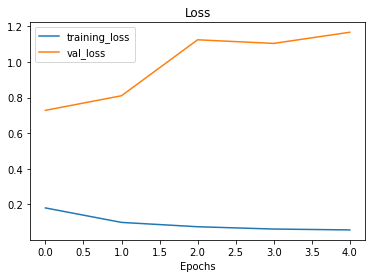

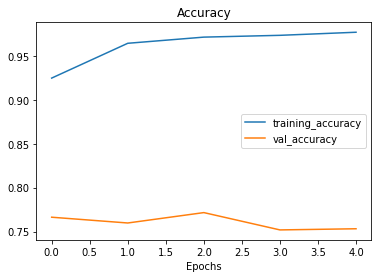

In [ ]:
# plot loss curves
plot_loss_curves(model_3_history)

In [ ]:
# Compare performance
print(f"""
Model_1 Performance. {model_1_performance_score}
\n\n
Model_2 Performance. {model_2_performance}
\n\n
Model_3 Performacne. {model_3_performance}

""")


Model_1 Performance. {'accuracy': 78.74015748031496, 'precision': 0.7923216200196284, 'recall': 0.7874015748031497, 'f1': 0.7844114973523961}



Model_2 Performance. {'accuracy': 76.50918635170603, 'precision': 0.7746651651856151, 'recall': 0.7650918635170604, 'f1': 0.7596870346821398}



Model_3 Performacne. {'accuracy': 75.32808398950131, 'precision': 0.7529952160130181, 'recall': 0.7532808398950132, 'f1': 0.7522494297950951}




### Model_4 -- Bidirectional RNN

In [ ]:
# Creating a Bidirectional RNN model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
#x = layers.Bidirectional(layers.GRU(64))(x)
#x = layers.GlobalMaxPool1D()(x)
output = layers.Dense(1, activation="sigmoid")(x)

# create model_4
model_4 = tf.keras.Model(inputs, output, name = "model_4_Bidrection_RNN")


In [ ]:
model_4.summary()

Model: "model_4_Bidrection_RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,

In [ ]:
# new summary
model_4.summary()

Model: "model_4_Bidrection_RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,

In [ ]:
# Compile the model_4
model_4.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# fit the model_4
model_4_history = model_4.fit(train_sent,
                              train_label,
                              epochs=5,
                              validation_data = (val_sent, val_label),
                              callbacks = [create_tensorboard_callback(save_dir, 
                                                                       experiment_name = "model_4_Bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/model_4_Bidirectional_RNN/20220814-045712
Epoch 1/5
215/215 [==============================] - 5s 11ms/step - loss: 0.1412 - accuracy: 0.9447 - val_loss: 0.9297 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0594 - accuracy: 0.9747 - val_loss: 1.0760 - val_accuracy: 0.7520
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0516 - accuracy: 0.9771 - val_loss: 1.4253 - val_accuracy: 0.7598
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0498 - accuracy: 0.9772 - val_loss: 1.2220 - val_accuracy: 0.7598
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0446 - accuracy: 0.9783 - val_loss: 1.3946 - val_accuracy: 0.7664


In [ ]:
# Evaluate model_4
model_4.evaluate(val_sent, val_label)

24/24 [==============================] - 0s 4ms/step - loss: 1.3946 - accuracy: 0.7664


[1.3946341276168823, 0.7664042115211487]

In [ ]:
# new result
model_4.evaluate(val_sent, val_label)

24/24 [==============================] - 0s 4ms/step - loss: 1.3946 - accuracy: 0.7664


[1.3946341276168823, 0.7664042115211487]

In [ ]:
model_4_pred_probs = model_4.predict(val_sent)
model_4_pred = tf.squeeze(tf.round(model_4_pred_probs))
model_4_pred[:10], model_4_pred_probs[:10]

(<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 0., 1., 1., 0.], dtype=float32)>,
 array([[1.6942334e-04],
        [8.4713405e-01],
        [9.9999332e-01],
        [2.2627607e-01],
        [1.3147881e-05],
        [9.9986005e-01],
        [3.5792515e-03],
        [9.9999869e-01],
        [9.9999809e-01],
        [4.0262175e-01]], dtype=float32))

In [ ]:
model_4_performance = calculate_results(y_true = val_label, y_pred = model_4_pred)
model_4_performance

{'accuracy': 76.64041994750657,
 'f1': 0.763277279656718,
 'precision': 0.7700415019325116,
 'recall': 0.7664041994750657}

## Convutional Neural Network for Sequence dataset
 for sequence data we've use Conv1D layer

### Model_5 1D_CNN (Convutional Nuerual Network)

* **Structure 1D_CNN for NLP**

  `Inputs -> Vectorizer(tokenizer) -> Embedding -> Conv1D_layer -> Pooling_layer -> Output`

In [ ]:
# Create a CNN model
inputs = layers.Input(shape = (1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
# Convutional layer
x = layers.Conv1D(64,kernel_size = 5, activation = "relu")(x)
# pooling layers
x = layers.GlobalMaxPooling1D()(x)
# Dense layers
output = layers.Dense(1, activation = "sigmoid")(x)

# Create model_5
model_5 = tf.keras.Model(inputs, output, name = "model_5_CNN")


In [ ]:
model_5.summary()

Model: "model_5_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)                 

In [ ]:
# Compile model_5
model_5.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"]) 

In [ ]:
# Fit model_5
model_5_history = model_5.fit(train_sent,
                              train_label,
                              epochs = 5,
                              validation_data = (val_sent, val_label),
                              callbacks = [create_tensorboard_callback(save_dir, experiment_name = "modek_5_1D_CNN")])

Saving TensorBoard log files to: model_logs/modek_5_1D_CNN/20220814-045726
Epoch 1/5
215/215 [==============================] - 8s 6ms/step - loss: 0.1479 - accuracy: 0.9569 - val_loss: 0.8573 - val_accuracy: 0.7493
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0734 - accuracy: 0.9740 - val_loss: 1.0166 - val_accuracy: 0.7480
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0609 - accuracy: 0.9762 - val_loss: 1.0575 - val_accuracy: 0.7349
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0533 - accuracy: 0.9796 - val_loss: 1.1261 - val_accuracy: 0.7362
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0487 - accuracy: 0.9813 - val_loss: 1.1574 - val_accuracy: 0.7480


In [ ]:
# Evaluate model
model_5.evaluate(val_sent, val_label)

24/24 [==============================] - 0s 3ms/step - loss: 1.1574 - accuracy: 0.7480


[1.1574138402938843, 0.748031497001648]

In [ ]:
model_5_pred_probs = model_5.predict(val_sent)
model_5_pred_probs[:10]

array([[2.5735056e-02],
       [9.8033762e-01],
       [9.9984944e-01],
       [1.4466316e-01],
       [9.3010624e-07],
       [9.8948342e-01],
       [7.5333315e-01],
       [9.9996531e-01],
       [9.9999869e-01],
       [4.4415876e-01]], dtype=float32)

In [ ]:
model_5_pred = tf.squeeze(tf.round(model_5_pred_probs))
model_5_pred[:10]


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_5_performance = calculate_results(y_true =  val_label, y_pred=model_5_pred)
model_5_performance

{'accuracy': 74.80314960629921,
 'f1': 0.7458864948686166,
 'precision': 0.7488526485901512,
 'recall': 0.7480314960629921}

## Tensorflow Hub pretrained feature extractor(using transfer learning for NLP)


### Model_6 with USE(Universal Sentence Encoder)

In [ ]:
import tensorflow_hub as hub

In [ ]:
# load universal sentences encoder model
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
# First we need to create sentence layer with hub.keraslayer
sentence_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                trainable = False,
                                input_shape = [],
                                dtype = tf.string,
                                name = "USE")

In [ ]:
# Create a USE model
# here we using Sequential API for building our USE model
# Crete model_6
model_6 = tf.keras.Sequential([
  sentence_layer,
  layers.Dense(64, activation="relu", name ="Dense_layer"),
  layers.Dense(1,activation = "sigmoid", name = "output_layer")
])


In [ ]:
model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 Dense_layer (Dense)         (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Compile model_6
model_6.compile(loss ="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
# Fit model_6
model_6_history = model_6.fit(train_sent,
                              train_label,
                              epochs = 5,
                              validation_data = (val_sent, val_label),
                              callbacks = [create_tensorboard_callback(save_dir, experiment_name = "model_6_USE")])

Saving TensorBoard log files to: model_logs/model_6_USE/20220814-045807
Epoch 1/5
215/215 [==============================] - 7s 14ms/step - loss: 0.5070 - accuracy: 0.7846 - val_loss: 0.4510 - val_accuracy: 0.8018
Epoch 2/5
215/215 [==============================] - 2s 12ms/step - loss: 0.4141 - accuracy: 0.8156 - val_loss: 0.4401 - val_accuracy: 0.8097
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4020 - accuracy: 0.8216 - val_loss: 0.4362 - val_accuracy: 0.8097
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3927 - accuracy: 0.8298 - val_loss: 0.4294 - val_accuracy: 0.8189
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3861 - accuracy: 0.8294 - val_loss: 0.4278 - val_accuracy: 0.8176


In [ ]:
# Evaluate model_6
model_6.evaluate(val_sent, val_label)


24/24 [==============================] - 0s 10ms/step - loss: 0.4278 - accuracy: 0.8176


[0.42778849601745605, 0.817585289478302]

In [ ]:
# model_6 prediction
model_6_pred_probs = model_6.predict(val_sent)
model_6_pred_probs[:10]

array([[0.16860674],
       [0.798124  ],
       [0.9885515 ],
       [0.20150748],
       [0.73092866],
       [0.7576783 ],
       [0.980454  ],
       [0.98166615],
       [0.93218523],
       [0.08106703]], dtype=float32)

In [ ]:
model_6_pred = tf.squeeze(tf.round(model_6_pred_probs))
model_6_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_6_performance = calculate_results(y_true = val_label, y_pred = model_6_pred)
model_6_performance

{'accuracy': 81.75853018372703,
 'f1': 0.8159820561172786,
 'precision': 0.8202616926815424,
 'recall': 0.8175853018372703}

In [ ]:
# model_6 evaluation after update
model_6.evaluate(val_sent, val_label)

24/24 [==============================] - 0s 10ms/step - loss: 0.4278 - accuracy: 0.8176


[0.42778852581977844, 0.817585289478302]

In [ ]:
# model_6 prediction after update
model_6_pred_probs_after = model_6.predict(val_sent)


In [ ]:
model_6_pred_after = tf.squeeze(tf.round(model_6_pred_probs_after))
model_6_pred_after[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_6_performance_after = calculate_results(y_true = val_label, y_pred = model_6_pred_after)
model_6_performance_after

{'accuracy': 81.75853018372703,
 'f1': 0.8159820561172786,
 'precision': 0.8202616926815424,
 'recall': 0.8175853018372703}

### model 7 - same as model 6 but we train our model 7 on 10% of dataset 

In [ ]:
shuffle_train_df.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


**This dataset show us the data leakege probelem**
```train_10_percent = shuffle_train_df[["text", "target"]].sample(frac = 0.1,random_state = 42)
train_10_percent.head(), len(train_10_percent)```

In [ ]:
train_10_percent_split = int(0.1*len(train_sent))
train_10_percent_split

685

In [ ]:
train_sent_10 = train_sent[:train_10_percent_split]
train_label_10 = train_label[:train_10_percent_split]

In [ ]:
shuffle_train_df.value_counts("target")

target
0    4342
1    3271
dtype: int64

In [ ]:
# values count in our updated 10 percent dataset
pd.Series(np.array(train_label_10)).value_counts()

0    406
1    279
dtype: int64

**Building model 7**

In [ ]:
# Create model 7
model_7 = tf.keras.Sequential([
    sentence_layer,
    layers.Dense(64, activation = "relu"),
    layers.Dense(1, activation="sigmoid")

])

In [ ]:
# Compile model 7
model_7.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
# Fit model 7
model_7_history = model_7.fit(train_sent_10,
                              train_label_10,
                              epochs = 5,
                              validation_data = (val_sent, val_label),
                              callbacks = [create_tensorboard_callback(save_dir,
                                                                       experiment_name = "model_7_10%")])

Saving TensorBoard log files to: model_logs/model_7_10%/20220814-045832
Epoch 1/5
22/22 [==============================] - 2s 45ms/step - loss: 0.6671 - accuracy: 0.6978 - val_loss: 0.6470 - val_accuracy: 0.7362
Epoch 2/5
22/22 [==============================] - 1s 26ms/step - loss: 0.5952 - accuracy: 0.8073 - val_loss: 0.5869 - val_accuracy: 0.7717
Epoch 3/5
22/22 [==============================] - 1s 26ms/step - loss: 0.5177 - accuracy: 0.8204 - val_loss: 0.5327 - val_accuracy: 0.7795
Epoch 4/5
22/22 [==============================] - 1s 25ms/step - loss: 0.4582 - accuracy: 0.8248 - val_loss: 0.5038 - val_accuracy: 0.7887
Epoch 5/5
22/22 [==============================] - 1s 26ms/step - loss: 0.4192 - accuracy: 0.8365 - val_loss: 0.4886 - val_accuracy: 0.7848


In [ ]:
# evaluate model 7
model_7.evaluate(val_sent, val_label)

24/24 [==============================] - 0s 10ms/step - loss: 0.4886 - accuracy: 0.7848


[0.48858654499053955, 0.7847769260406494]

In [ ]:
model_7_pred_probs = model_7.predict(val_sent)
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:15]

<tf.Tensor: shape=(15,), dtype=float32, numpy=
array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1.],
      dtype=float32)>

In [ ]:
model_7_performance = calculate_results(y_true = val_label,
                                        y_pred = model_7_preds)
model_7_performance

{'accuracy': 78.4776902887139,
 'f1': 0.7832842389959473,
 'precision': 0.7857855246683945,
 'recall': 0.7847769028871391}

In [ ]:
train_sent

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       ...,
       'Near them on the sand half sunk a shattered visage lies... http://t.co/0kCCG1BT06',
       "kesabaran membuahkan hasil indah pada saat tepat! life isn't about waiting for the storm to pass it's about learning to dance in the rain.",
       "@ScottDPierce @billharris_tv @HarrisGle @Beezersun I'm forfeiting this years fantasy football pool out of fear I may win n get my ass kicked"],
      dtype=object)

✅**Important Note:** - whena a model with same architecture and trained on 10% of dataset and beat the model with same architecture and trained on 100% than it's means your data split has been wrong there is a **Data leakage** probelem which has to be solve

## now let's compare our all model experiments

In [ ]:
all_model_results = pd.DataFrame({"0_baseline_result": baseline_result,
                                  "1_simple_dense": model_1_performance_score,
                                  "2_LSTM": model_2_performance,
                                  "3_GRU": model_3_performance,
                                  "4_bidirectional_RNN": model_4_performance,
                                  "5_conv1d": model_5_performance,
                                  "6_tf_hub_USE_100%": model_6_performance,
                                  "7_tf_hub_USE_10%": model_7_performance})
all_model_results = all_model_results.transpose()

In [ ]:
# convert our accuracy same as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100
all_model_results

,accuracy,precision,recall,f1
0_baseline_result,0.792651,0.811139,0.792651,0.786219
1_simple_dense,0.787402,0.792322,0.787402,0.784411
2_LSTM,0.765092,0.774665,0.765092,0.759687
3_GRU,0.753281,0.752995,0.753281,0.752249
4_bidirectional_RNN,0.766404,0.770042,0.766404,0.763277
5_conv1d,0.748031,0.748853,0.748031,0.745886
6_tf_hub_USE_100%,0.817585,0.820262,0.817585,0.815982
7_tf_hub_USE_10%,0.784777,0.785786,0.784777,0.783284


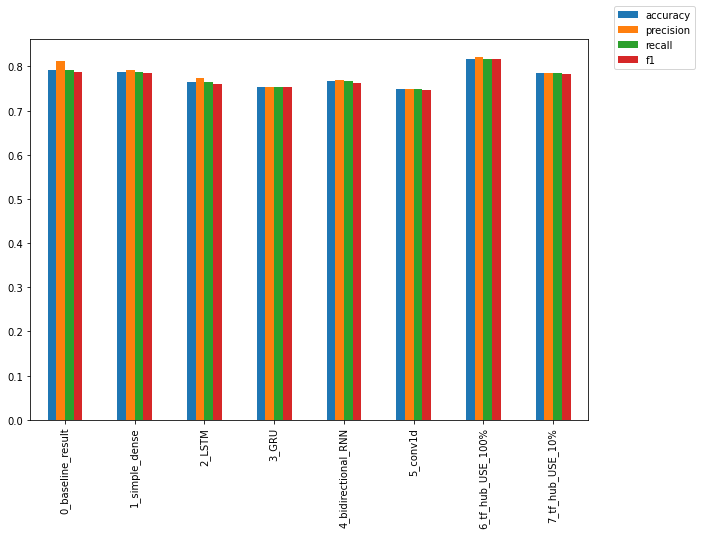

In [ ]:
# plot our experiments
all_model_results.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor=(1.2, 1.1))

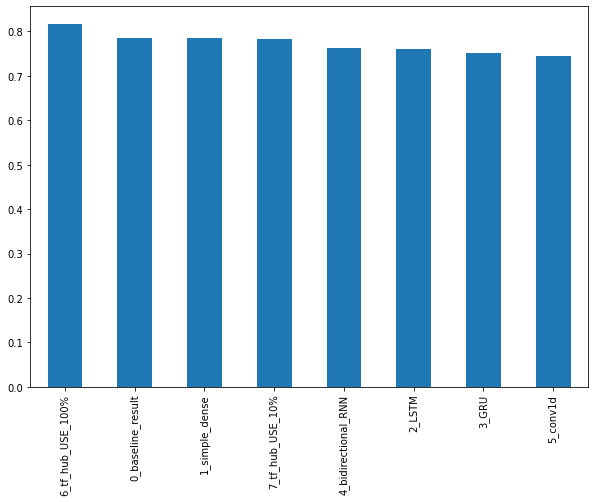

In [ ]:
# Now let's plot graph using f1 score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10,7))

In [ ]:
"""# Uploading our experiments on tensorboard dev
!tensorboard dev upload --logdir ./model_logs/ \
  --name 'Tensorflow NLP modeling experiments'\
  --description "Comparing different type of model experiments on kaggle tweet datasets"\
  --one_shot"""

'# Uploading our experiments on tensorboard dev\n!tensorboard dev upload --logdir ./model_logs/   --name \'Tensorflow NLP modeling experiments\'  --description "Comparing different type of model experiments on kaggle tweet datasets"  --one_shot'

## Save and load model

**Save Model**

In [ ]:
model_6.save("transfer_learning_USE.h5")

**Load Model**

In [ ]:
from tensorflow import keras

In [ ]:
from tensorflow_hub import keras_layer
loaded_model = keras.models.load_model("transfer_learning_USE.h5", 
                                       custom_objects = {'KerasLayer': hub.KerasLayer} )
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 Dense_layer (Dense)         (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# evaluate loaded model
loaded_model.evaluate(val_sent,val_label)

24/24 [==============================] - 1s 10ms/step - loss: 0.4278 - accuracy: 0.8176


[0.4277884364128113, 0.817585289478302]

In [ ]:
model_6_performance

{'accuracy': 81.75853018372703,
 'f1': 0.8159820561172786,
 'precision': 0.8202616926815424,
 'recall': 0.8175853018372703}

## Find out most wrong example/prediction make by our mdoel

 **Download a pretrained feature extractor model**

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip


--2022-08-14 04:58:48--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 142.250.152.128, 108.177.111.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M   106MB/s    in 11s     

2022-08-14 04:58:59 (83.5 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variabl

In [ ]:
# import our pretrained mode
model_6_pretrained = keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_11 (Dense)            (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_6_pretrained.evaluate(val_sent, val_label)

24/24 [==============================] - 1s 10ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723119258880615, 0.8162729740142822]

In [ ]:
# make predtiction with pretrained model
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sent)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Create dataframe of our pretrained model validations
val_df = pd.DataFrame({"text": val_sent,
                       "target": val_label,
                       "preds": model_6_pretrained_preds,
                       "pred_probs": tf.squeeze(model_6_pretrained_pred_probs)})
val_df.head()

,text,target,preds,pred_probs
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


**False positive class**

In [ ]:
# most wrong preds
wrong_preds = val_df[val_df["target"] != val_df["preds"]].sort_values("pred_probs",ascending=False)
wrong_preds.head(10)

,text,target,preds,pred_probs
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


**False negative class**

In [ ]:
wrong_preds.tail(10)

,text,target,preds,pred_probs
536,@DavidVonderhaar At least you were sincere ??,1,0.0,0.067303
408,@willienelson We need help! Horses will die!Pl...,1,0.0,0.055076
294,Lucas Duda is Ghost Rider. Not the Nic Cage ve...,1,0.0,0.054603
221,going to redo my nails and watch behind the sc...,1,0.0,0.054597
59,You can never escape me. Bullets don't harm me...,1,0.0,0.049637
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043918
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


In [ ]:
# Now let's check out the False postive value (when target is 0 but model predicted it to 1)
for row in wrong_preds[:10].itertuples():
  _, text, target, preds, pred_probs = row
  print(f"Target: {target}, Preds:{preds}, Probs: {pred_probs}")
  print(f"Text: \n{text}\n")
  print("----\n")

Target: 0, Preds:1.0, Probs: 0.9101957678794861
Text: 
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Preds:1.0, Probs: 0.8769821524620056
Text: 
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Preds:1.0, Probs: 0.8523000478744507
Text: 
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Preds:1.0, Probs: 0.8354544043540955
Text: 
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Preds:1.0, Probs: 0.8272132873535156
Text: 
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

----

Target: 0, Preds:1.0, Probs: 0.8148158192634583
Text: 
@SonofLiberty357 all illuminated by the brightly burning buildings all around th

In [ ]:
# Find false negative(when target is 1 and model predict 0)
for row in wrong_preds[-10:].itertuples():
  _, text, target, preds, pred_probs = row
  print(f"Target: {target}, Preds:{preds}, Probs: {pred_probs}")
  print(f"Text: \n{text}\n")
  print("----\n")

Target: 1, Preds:0.0, Probs: 0.06730346381664276
Text: 
@DavidVonderhaar At least you were sincere ??

----

Target: 1, Preds:0.0, Probs: 0.05507579818367958
Text: 
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Preds:0.0, Probs: 0.05460338667035103
Text: 
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Preds:0.0, Probs: 0.054597001522779465
Text: 
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

Target: 1, Preds:0.0, Probs: 0.04963727295398712
Text: 
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Preds:0.0, Probs: 0.043918490409851074
Text: 
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

----

Target: 1, Preds:0

In [ ]:
sample_text = ["As a developer, do you use computer?"]

In [ ]:
tf.round(model_6_pretrained.predict(sample_text))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.]], dtype=float32)>

## Speed/test_score
as we know a model is can not be applied if it's take to much time on predictions/test

In [ ]:
from time import perf_counter

In [ ]:
# create a function to caluclate the prediction time
def cal_pred_time(model, sample):
  """
    input:
      model - model for testing
      sample - testing sample
    return:
      return time consuming by model for making prediction
  """
  start_time = time.perf_counter()
  model.predict(sample)
  end_time = time.perf_counter()
  total_time = end_time-start_time
  total_pred_time = total_time/len(sample)
  return total_time, total_pred_time

**Time taken by baseline model**

In [ ]:
base_line_total_time, baseline_pred_time = cal_pred_time(model_0, val_sent)
base_line_total_time, baseline_pred_time

(0.021371602999806782, 2.8046723096859295e-05)

**Time taken by USE model**

In [ ]:
model_6_pretrained_total_time, model_6_pretrained_pred_time = cal_pred_time(model_6_pretrained, val_sent)
model_6_pretrained_total_time, model_6_pretrained_pred_time

(0.24159296699963306, 0.00031705113779479407)

In [ ]:
baseline_result

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

In [ ]:
model_6_pre_results = calculate_results(y_true = val_label, y_pred = model_6_pretrained_preds)
model_6_pre_results

{'accuracy': 81.62729658792651,
 'f1': 0.8148082644367335,
 'precision': 0.818446310697231,
 'recall': 0.8162729658792651}

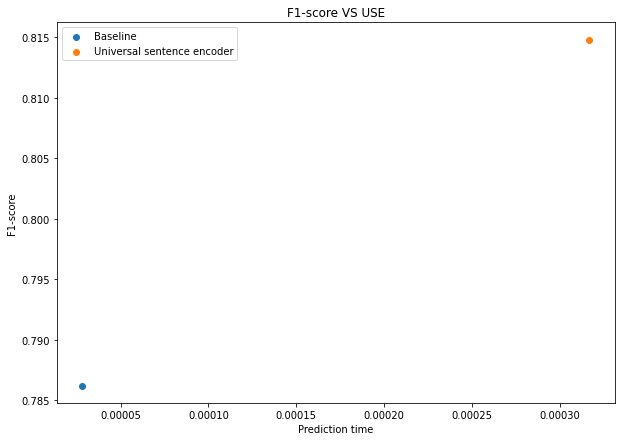

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(baseline_pred_time, baseline_result["f1"], label="Baseline")
plt.scatter(model_6_pretrained_pred_time, model_6_pre_results["f1"], label = "Universal sentence encoder")
plt.title("F1-score VS USE")
plt.xlabel("Prediction time")
plt.ylabel("F1-score")
plt.legend();